In [1]:
from MatchingModel import *
from Policies import *
import time

%load_ext line_profiler

%matplotlib inline

### Normal arrival rates and high cost on Workload

In [2]:
NN = MatchingGraph([(1,1),(1,2),(2,2),(2,3),(3,3)],3,3)
alpha = np.array([3./6., 2./6., 1./6.])
beta = np.array([1.75/6., 2.75/6., 1.5/6.])
arrival_dist = NodesData.items(alpha,beta,NN)
costs = NodesData(np.array([1., 2., 3., 1., 2., 3.]),NN)
#P = [TwP_policy([0., 0., 1.]),TwMW_policy([0., 1.],costs),MaxWeight_policy(costs), hMWT_policy(NN,Workload_index=['d',(3,)], alpha=arrival_dist, costs=costs, beta=2., kappa=10., theta=1., delta_plus=0.01, NUmax=8.)]
P = [TwP_policy([0., 0., 1.]),MaxWeight_policy(costs), hMWT_policy(NN,Workload_index=['d',(3,)], alpha=arrival_dist, costs=costs, beta=2., kappa=10., theta=1., delta_plus=0.01, NUmax=8.)]
x0 = State.zeros(NN)
test_model = Model(NN,arrival_dist,costs,x0)

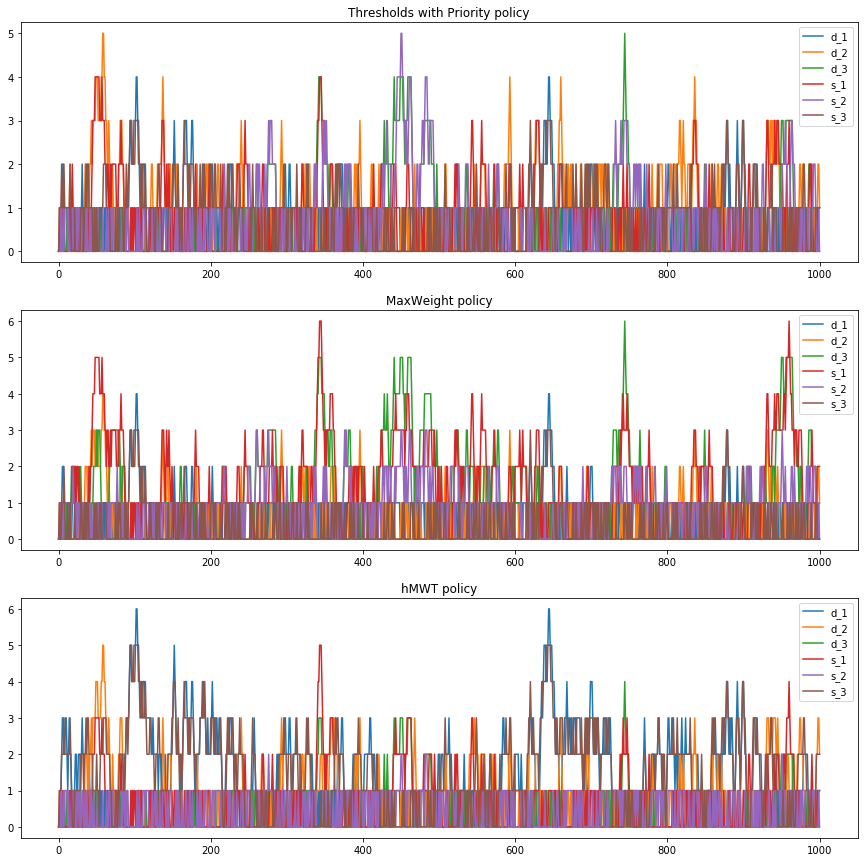

In [3]:
t = test_model.run(1000,P,plot=True)

1449.21089053154


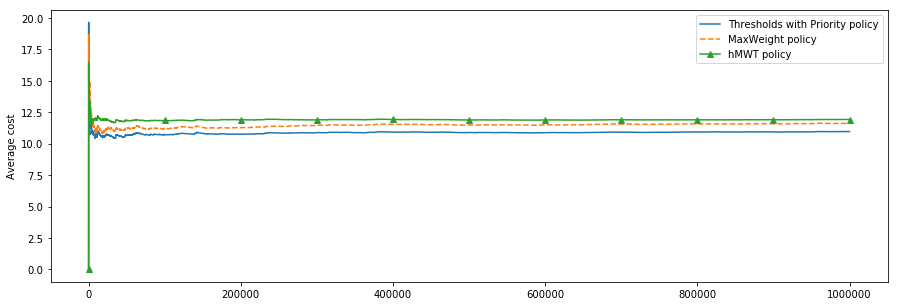

In [43]:
t = time.time()
N = 1000000
c = test_model.average_cost(N,P,plot=True)
print(time.time()-t)

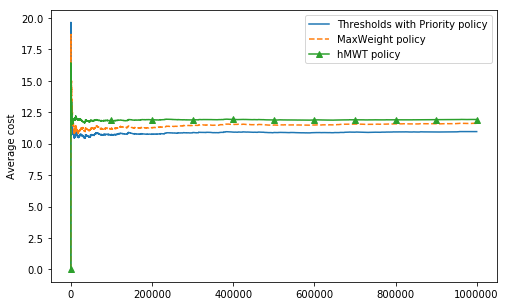

In [44]:

nb_iter=1000000
costs_traj = c[0]
plt.figure(figsize=(8,5))
linestyles = ['-', '--', '-^', ':']
for p, policy in enumerate(P):
    plt.plot(costs_traj[p],linestyles[p],label=str(policy),markevery=int(nb_iter/10.))
plt.legend(loc='best')
plt.ylabel('Average cost')

1668.2971868515015


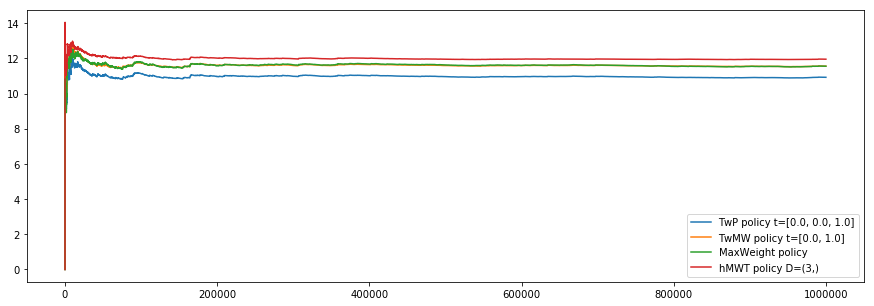

In [23]:
t = time.time()
N = 1000000
c = test_model.average_cost(N,P,plot=True)
print(time.time()-t)

In [24]:
c[0]

[array([  0.        ,   2.5       ,   5.33333333, ...,  10.92316392,
         10.923165  ,  10.92316808]),
 array([  0.        ,   2.5       ,   5.33333333, ...,  11.55813756,
         11.558143  ,  11.55815044]),
 array([  0.        ,   2.5       ,   3.66666667, ...,  11.55341555,
         11.553416  ,  11.55341845]),
 array([  0.        ,   2.5       ,   5.33333333, ...,  11.95245095,
         11.952459  ,  11.95246905])]

### Normal arrival rates and high costs on middle nodes

In [25]:
NN = MatchingGraph([(1,1),(1,2),(2,2),(2,3),(3,3)],3,3)
alpha = np.array([3./6., 2./6., 1./6.])
beta = np.array([1.75/6., 2.75/6., 1.5/6.])
arrival_dist = NodesData.items(alpha,beta,NN)
costs = NodesData(np.array([1., 3., 1., 1., 3., 1.]),NN)
P = [TwP_policy([0., 0., 1.]),TwMW_policy([0., 1.],costs),MaxWeight_policy(costs), hMWT_policy(NN,Workload_index=['d',(3,)], alpha=arrival_dist, costs=costs, beta=2., kappa=10., theta=1., delta_plus=0.01, NUmax=8.)]
x0 = State.zeros(NN)
test_model = Model(NN,arrival_dist,costs,x0)

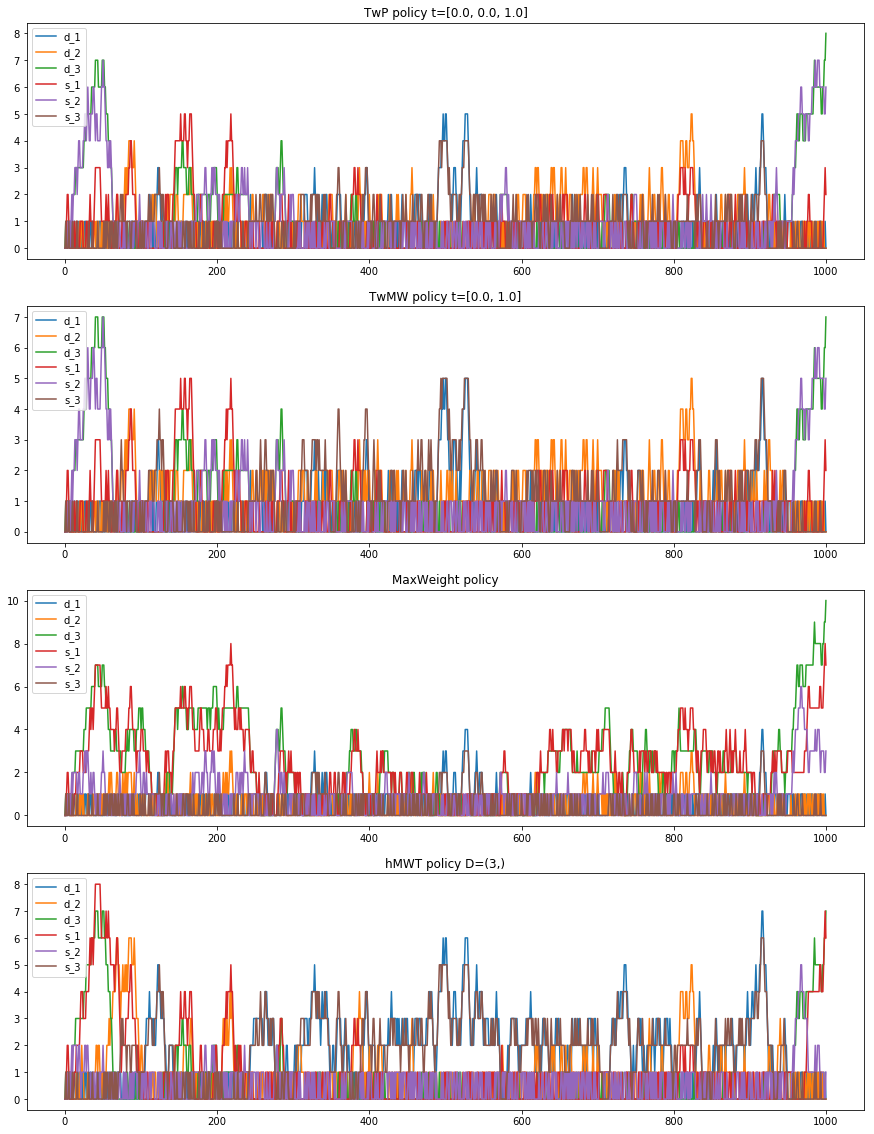

In [26]:
t = test_model.run(1000,P,plot=True)

1676.531732559204


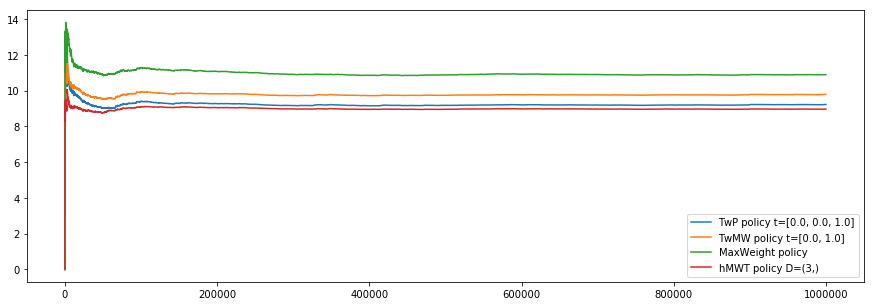

In [27]:
t = time.time()
N = 1000000
c, x = test_model.average_cost(N,P,plot=True)
print(time.time()-t)

In [28]:
c

[array([ 0.        ,  2.        ,  3.33333333, ...,  9.23010523,
         9.230108  ,  9.23011277]),
 array([ 0.        ,  2.        ,  3.33333333, ...,  9.79294779,
         9.79295   ,  9.79295421]),
 array([  0.        ,   2.        ,   3.33333333, ...,  10.8979549 ,
         10.897952  ,  10.8979511 ]),
 array([ 0.        ,  2.        ,  3.33333333, ...,  8.97316897,
         8.97317   ,  8.97317103])]

### Asymptotic arrival rates and high costs on Workload

In [33]:
NN = MatchingGraph([(1,1),(1,2),(2,2),(2,3),(3,3)],3,3)
alpha = np.array([3./6., 2./6., 1./6.])
beta = np.array([1.97/6., 2.97/6., 1.06/6.])
arrival_dist = NodesData.items(alpha,beta,NN)
costs = NodesData(np.array([1., 2., 3., 1., 2., 3.]),NN)
#P = [TwP_policy([0., 0., 9.]),TwMW_policy([0., 9.],costs),MaxWeight_policy(costs), hMWT_policy(NN,Workload_index=['d',(3,)], alpha=arrival_dist, costs=costs, beta=2., kappa=10., theta=1., delta_plus=0.01, NUmax=8.)]
P = [TwP_policy([0., 0., 9.]),MaxWeight_policy(costs), hMWT_policy(NN,Workload_index=['d',(3,)], alpha=arrival_dist, costs=costs, beta=2., kappa=10., theta=1., delta_plus=0.01, NUmax=8.)]
x0 = State.zeros(NN)
test_model = Model(NN,arrival_dist,costs,x0)

In [31]:
Pbis = [TwPbis_policy([0., 0., 9.])]

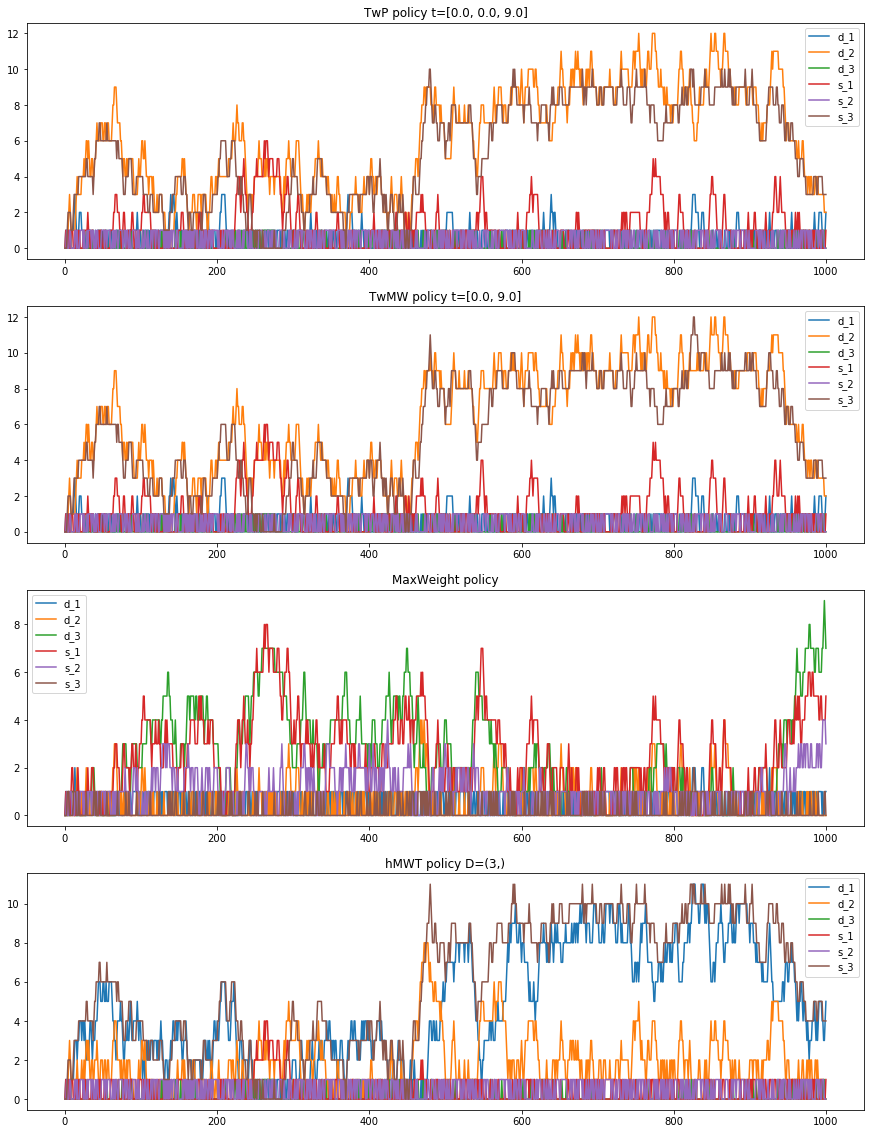

In [12]:
t = test_model.run(1000,P,plot=True)

326.39795327186584


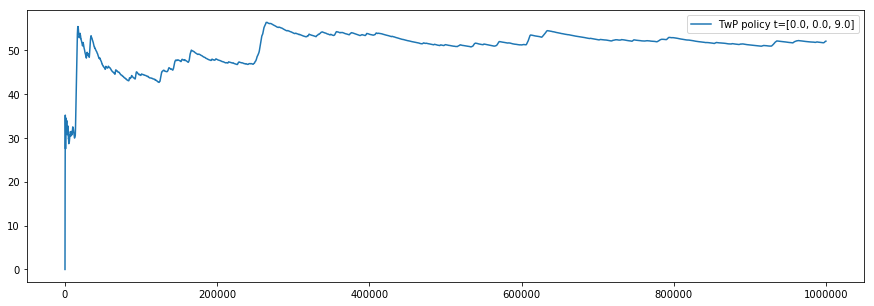

In [32]:
t = time.time()
N = 1000000
c = test_model.average_cost(N,Pbis,plot=True)
print(time.time()-t)

In [33]:
c[0]

[array([  0.        ,   2.        ,   2.66666667, ...,  52.04904305,
         52.049039  ,  52.04903595])]

1456.5441257953644


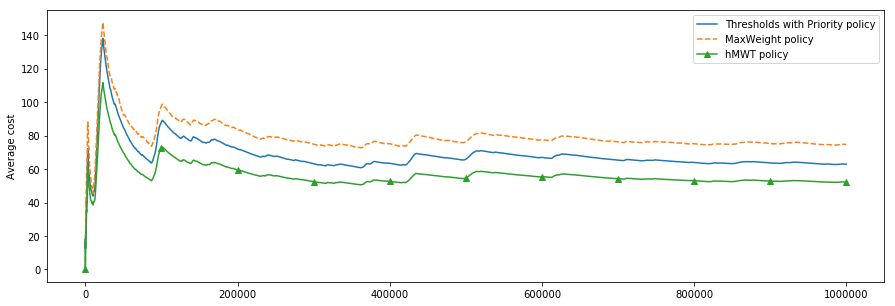

In [35]:
t = time.time()
N = 1000000
c = test_model.average_cost(N,P,plot=True)
print(time.time()-t)

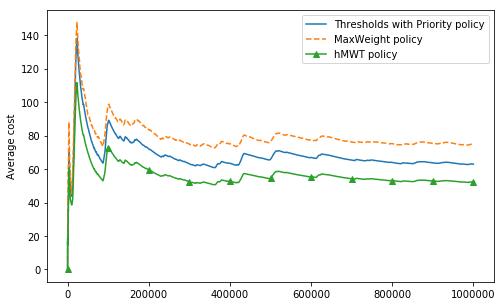

In [40]:

nb_iter=1000000
costs_traj = c[0]
plt.figure(figsize=(8,5))
linestyles = ['-', '--', '-^', ':']
for p, policy in enumerate(P):
    plt.plot(costs_traj[p],linestyles[p],label=str(policy),markevery=int(nb_iter/10.))
plt.legend(loc='best')
plt.ylabel('Average cost')

In [20]:
c[0]

[array([  0.        ,   2.        ,   3.        , ...,  47.03965204,
         47.039637  ,  47.03961996]),
 array([  0.        ,   2.        ,   3.        , ...,  47.23051723,
         47.230507  ,  47.23049477]),
 array([  0.        ,   2.        ,   3.        , ...,  58.29413129,
         58.294095  ,  58.29405671]),
 array([  0.        ,   2.        ,   3.        , ...,  39.86042186,
         39.860413  ,  39.86040414])]

### Other tests

In [48]:
NS = NodesData_wSlice(np.array([1., 0., 2., 3., 0.]),W)
NS[S]

array([ 1.,  2.])

In [43]:
S = NodesSlice('d',np.array([1,3]))
S.index

array([1, 3])

In [71]:
%lprun -f test_slice test_slice(True,100000)

In [70]:
def test_slice(S,n):
    if S:
        N = NodesData_wSlice(np.array([1., 0., 2., 3., 0.]),W)
    else:
        N = NodesData(np.array([1., 0., 2., 3., 0.]),W)
        
    for _ in range(n):
        s = NodesSlice('d',np.array([1,3]))
        a = N[s]

In [39]:
class NodesSlice:
    def __init__(self, t, index):
        self.t = t
        self.index = index

class NodesData_wSlice(NodesData):
    
    def __getitem__(self, key):
        if isinstance(key, NodesSlice):
            if key.t == 'd':
                return self.data[key.index-1]
            else:
                return self.data[key.index+self.matchingGraph.nb_demand_classes-1]
        else:
            i, j = key
            return self.data[[i-1, j+self.matchingGraph.nb_demand_classes-1]]
    